### Alignment analysis
---

In [1]:
import pandas as pd
import sys, os, json, s3fs
import matplotlib.pyplot as plt
plt.style.use("seaborn")
sys.path.insert(1, "../../")

import src.monitoring.utils as mu

%load_ext autoreload
%autoreload 2

In [2]:
prod_path = f"s3://sofi-data-science/jxu/data_dump/money_customer_risk/20210916-dev-prod-alignment/prod.parquet"
dev_path = "../../data/combined_all_features/combined_1632521410.feather"

prod_df = pd.read_parquet(prod_path)
dev_df = pd.read_feather(dev_path)

In [3]:
s3_path = "s3://sofi-data-science/jxu/data_dump/money_customer_risk/20210916-dev-prod-alignment/"
# dev_df.to_parquet(os.path.join(s3_path, "dev.parquet"))

#### Preprocessing

In [4]:
sample_date = "2021-09-15"
dev_df = dev_df[dev_df.sample_date==pd.Timestamp(sample_date)]

prod_df["last_checked_date"] = pd.to_datetime(prod_df["last_checked_date"])
prod_df["sample_date"] = prod_df["last_checked_date"].dt.date
prod_df = prod_df[prod_df["sample_date"]==pd.Timestamp(sample_date)]

/home/ec2-user/anaconda3/envs/customer_risk/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [5]:
dev_df = mu.prep_customer_data(dev_df)

prod_df["user_id"] = prod_df["party_id"]

In [6]:
prod_df.shape, dev_df.shape

((1129952, 58), (1119646, 98))

In [7]:
prod_df.head()

,party_id,created_dt,updated_dt,last_checked_date,last_checked_date_max,risk_group,request_source,model_score,model_decision_rule_details,mcustomer_model_risk_groupodel_score,...,nr_returns_30d,credit_card_loan_amount,transaction_code,age_money_account,fraud_score_1,transaction_code_encoded,all7120_default_encoded,bcc7120_default_encoded,sample_date,user_id
0,3749,2021-08-25 03:36:51.838,2021-09-15 03:47:17.171,2021-09-15 03:47:17.170,2021-09-15 03:47:17.170,"""RG1""","""scheduled""",415.193050,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,0.0,4199.0,ACHDW,30.0,NaN,5,-1.0,-1.0,2021-09-15,3749
1,13317,2021-06-09 02:28:21.787,2021-09-15 02:28:10.880,2021-09-15 02:28:10.879,2021-09-15 02:28:10.879,"""RG1""","""scheduled""",404.635070,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,0.0,NaN,ACHDW,449.0,0.0300,5,-1.0,-1.0,2021-09-15,13317
2,14192,2020-12-16 03:23:56.753,2021-09-15 02:14:11.971,2021-09-15 02:14:11.970,2021-09-15 02:14:11.970,"""RG2B""","""scheduled""",499.297733,"[{""ruleName"":""isMember"",""rulePassed"":false,""ri...","""RG2B""",...,0.0,19353.0,NONE,686.0,0.1243,0,-1.0,-1.0,2021-09-15,14192
4,32516,2020-11-11 03:46:29.313,2021-09-15 02:16:28.784,2021-09-15 02:16:28.783,2021-09-15 02:16:28.783,"""RG1""","""scheduled""",507.394183,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,0.0,673.0,NONE,745.0,0.0708,0,-1.0,-1.0,2021-09-15,32516
5,33224,2021-08-18 02:05:15.900,2021-09-15 02:07:07.008,2021-09-15 02:07:07.007,2021-09-15 02:07:07.007,"""RG3A""","""scheduled""",576.250640,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG3A""",...,0.0,NaN,NONE,1065.0,0.0468,0,-1.0,-1.0,2021-09-15,33224


In [8]:
dev_df.head()

,transaction_datetime,borrower_id,business_account_number,transaction_code,transaction_amount,external_account_number,real_ending_balance,user_id,sofi_employee_ind,dtc,...,sample_date,is_static,nr_transactions_next_60d,transaction_code_encoded,all7120_default_encoded,bcc7120_default_encoded,party_id,is_active,fico_adjusted,fico_adjusted_pred
8925451,NaT,107.0,410000276182,None,NaN,None,NaN,305,False,None,...,2021-09-15,True,0.0,0,-1.0,-1.0,305,False,NaN,NaN
8925452,2021-09-02 04:31:10,135.0,410000345005,ACHDWIN,-5.0,,3622.78,361,False,None,...,2021-09-15,True,3.0,3,-1.0,-1.0,361,True,NaN,NaN
8925453,2021-09-14 22:34:05,1183.0,410000300440,DWATM,-153.0,,2444.88,637,False,None,...,2021-09-15,True,1.0,8,-1.0,-1.0,637,True,NaN,NaN
8925454,NaT,141364.0,410011645378,None,NaN,None,NaN,457,False,None,...,2021-09-15,True,0.0,0,-1.0,-1.0,457,False,809.0,-809.0
8925455,2019-06-12 23:17:11,8421.0,410000331898,DWMBR,-250.0,,34.11,468,False,None,...,2021-09-15,True,0.0,0,-1.0,-1.0,468,False,NaN,NaN


#### Alignment of IDs
---

Overall population

In [9]:
dev_uids = dev_df["user_id"].unique()
prod_uids = prod_df["user_id"].unique()

In [10]:
dev_only = set(dev_uids) - set(prod_uids)
prod_only = set(prod_uids) - set(dev_uids)
shared_uids = set(dev_uids).intersection(set(prod_uids))

In [11]:
len(dev_only), len(prod_only), len(shared_uids)

(9711, 20061, 1109891)

How about the active users? - Nope

In [12]:
dev_df.is_active.value_counts()

False    953129
True     166517
Name: is_active, dtype: int64

In [13]:
active_ids = set(dev_df[dev_df.is_active].user_id.unique())
print(f"num active ids: {len(active_ids)}")
print(f"active ids shared across platforms: {len(active_ids.intersection(shared_uids))}")
print(f"active ids in prod only: {len(active_ids.intersection(prod_only))}")

num active ids: 166495
active ids shared across platforms: 161970
active ids in prod only: 0


#### Distribution Comparison
---

In [14]:
from smart_open import open
import pickle as pkl
from rdsutils.post_implementation_testing import plot_score_dist, get_psi, get_overlap_and_diff
from rdsutils.post_implementation_testing import plot_difference, get_combined_dfs, get_feature_comparison_report

In [15]:
incumbent_model_path = "s3://sofi-data-science/jxu/money-risk-models/models/customer_risk_target_no_giact_time_since_last_link.pkl"
with open(incumbent_model_path, "rb") as f:
    incumbent_model = pkl.load(f)

/home/ec2-user/anaconda3/envs/customer_risk/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [16]:
def get_risk_groups(serie):
    return pd.cut(serie.round(), [300, 474, 510, 560, 600, 850], 
                  right=True, labels=[f'RG{i}' for i in range(1, 6)],
                  include_lowest=True)

In [17]:
dev_df = mu.prep_customer_data(dev_df)  # get is_active here
features = incumbent_model.feature_name_
dev_df["model_score"] = incumbent_model.predict_proba(dev_df[features])[:,1]
dev_df["model_score"] = mu.scale_scores(dev_df["model_score"])

# get risk groups for the dev env
dev_df["risk_group_dev"] = get_risk_groups(dev_df["model_score"])
prod_df["risk_group_dev"] = get_risk_groups(prod_df["model_score"])

#### Full Population

In [18]:
# exact match percentage?
combined_df = get_combined_dfs(dev_df, prod_df, index_col="user_id")

In [19]:
df_ = combined_df[["user_id", "business_account_number_exp", "model_score_exp", "model_score_act"]]

In [20]:
# 15504149, 13834008  occured twice
display(df_[df_.user_id.isin([15504149, 13834008])])

# why two business account number?
# we dropped primary account owners 
df_ = df_[~df_.business_account_number_exp.isin([410001722493, 410014348707])]
display(df_[df_.user_id.isin([15504149, 13834008])])

,user_id,business_account_number_exp,model_score_exp,model_score_act
108877,13834008,410018816324,523.210422,537.370873
108878,13834008,410001722493,446.313428,537.370873
224452,15504149,410014348707,601.132936,687.783278
224453,15504149,410014348716,611.670026,687.783278


,user_id,business_account_number_exp,model_score_exp,model_score_act
108877,13834008,410018816324,523.210422,537.370873
224453,15504149,410014348716,611.670026,687.783278


In [21]:
# this is the exact alignment arpit is talking about
display((df_.model_score_exp == df_.model_score_act).value_counts(normalize=True))

False    0.988374
True     0.011626
dtype: float64

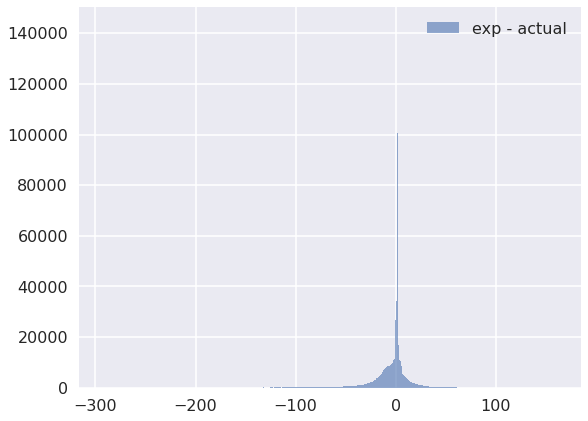

In [22]:
fig = plot_difference(df_.model_score_exp, df_.model_score_act, bins=1000)
plt.show()

In [23]:
score_diff = df_.model_score_exp - df_.model_score_act
# find quantile range
quantile_range = 0.9
lower = (1 - quantile_range) / 2
upper = (1 - quantile_range) / 2 + quantile_range
print(round(lower, 2), round(upper, 2))

# find score range
lower = score_diff.quantile(lower)
upper = score_diff.quantile(upper)
diff_range = upper - lower
print(round(lower, 2), round(upper, 2), round(diff_range, 2))

0.05 0.95
-32.88 15.11 47.98


In [24]:
# rmse 
import math
math.sqrt(((df_.model_score_exp - df_.model_score_act)**2).mean()) 

17.90524981089665

       feature       psi
0  model_score  0.003089


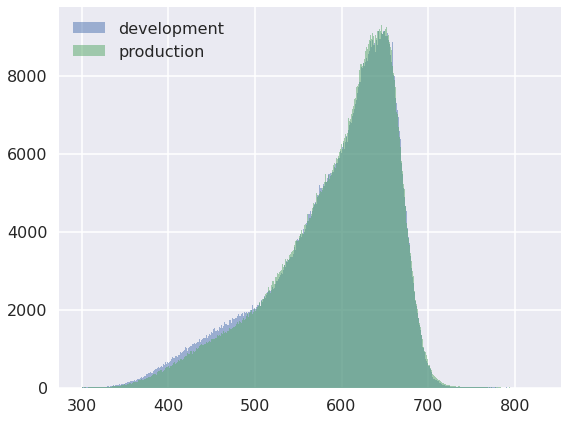

In [25]:
# full population
_ = plot_score_dist(dev_df.model_score, prod_df.model_score, bins=500)
print(get_psi(dev_df.model_score.to_frame(), 
              prod_df.model_score.to_frame()))

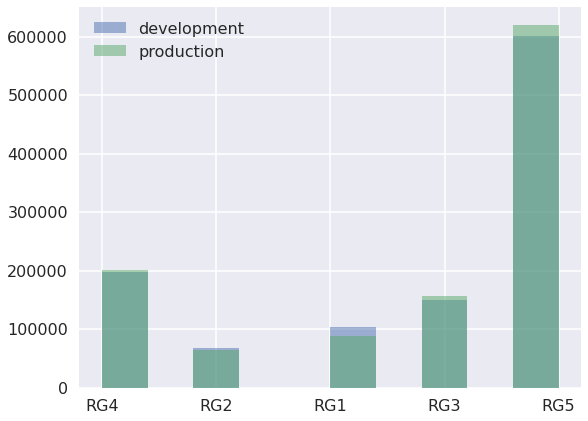

In [26]:
_ = plot_score_dist(dev_df.risk_group_dev, prod_df.risk_group_dev)

#### Active Population

166495
       feature       psi
0  model_score  0.015968


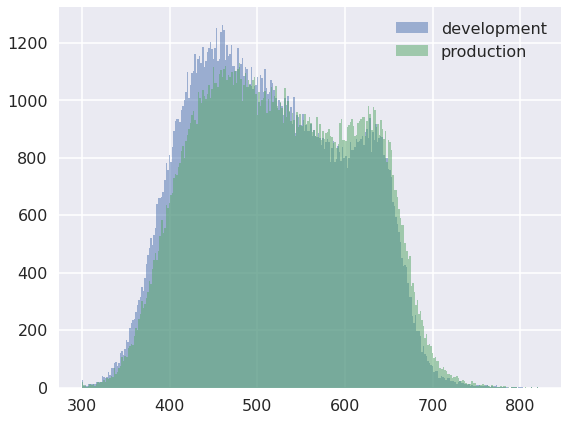

In [27]:
# active population 
print(len(active_ids))
dev_active = dev_df[dev_df.user_id.isin(active_ids)]
prod_active = prod_df[prod_df.user_id.isin(active_ids)]
_ = plot_score_dist(dev_active.model_score, 
                    prod_active.model_score, bins=300)
print(get_psi(dev_active.model_score.to_frame(), 
              prod_active.model_score.to_frame()))

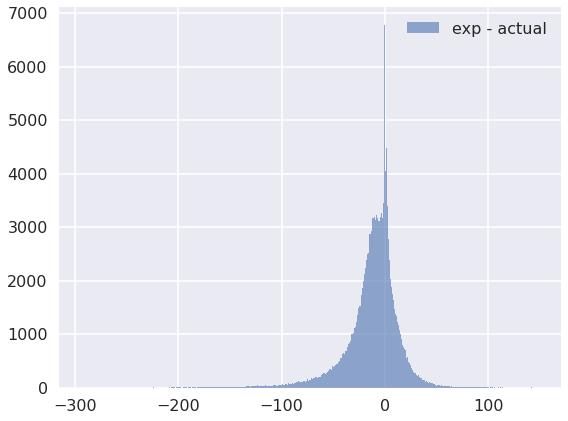

In [28]:
# combined df - active population
df_active = df_[df_.user_id.isin(active_ids)]
fig = plot_difference(df_active.model_score_exp, df_active.model_score_act, bins=500)
plt.show()

In [29]:
score_diff = df_active.model_score_exp - df_active.model_score_act
# find quantile range
quantile_range = 0.9
lower = (1 - quantile_range) / 2
upper = (1 - quantile_range) / 2 + quantile_range
print(round(lower, 2), round(upper, 2))

# find score range
lower = score_diff.quantile(lower)
upper = score_diff.quantile(upper)
diff_range = upper - lower
print(round(lower, 2), round(upper, 2), round(diff_range, 2))

0.05 0.95
-57.59 20.58 78.16


In [30]:
# rmse 
import math
math.sqrt(((df_active.model_score_exp - df_active.model_score_act)**2).sum()) / len(df_active)

0.07007276045443706

#### Look at feature behavior comparing the two env
---

columns in the combined df.

In [31]:
df_.shape

(1109923, 4)

In [32]:
features = incumbent_model.feature_name_

In [33]:
# psi combined_df
combined_df[["model_score_exp", "model_score_act"]]
columns = features + ["model_score"]
columns = ["user_id"] + list(map(lambda col: col+"_exp", columns))
dev_df_shared_id = combined_df[columns]


columns = features + ["model_score"]
columns = ["user_id"] + list(map(lambda col: col+"_act", columns))
prod_df_shared_id = combined_df[columns]

dev_df_shared_id.columns = ["user_id"] + features + ["model_score"]
prod_df_shared_id.columns = ["user_id"] + features + ["model_score"]

In [34]:
# all accounts
get_psi(dev_df[features], prod_df[features]).round(2).head()

,feature,psi
15,nr_past_transactions,0.56
6,transaction_as_pct_of_balance,0.11
38,transaction_code_encoded,0.06
26,time_since_last_transaction,0.03
18,address_risk_score,0.02


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


def plot_difference(expected_sequence, actual_sequence, 
                    figsize=(9,7), bins=10, title='', fig=None, ax=None):
    """ Plot the distr of difference of two sequences 
    Two sequences should have the same size
    """
    assert(len(expected_sequence) == len(actual_sequence))
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        
    seq = np.array(expected_sequence) - np.array(actual_sequence)
    ax.hist(seq, alpha=0.6, bins=bins, label='exp - actual')
    ax.set_title(title)
    ax.legend()
    return fig, ax

def plot_score_dist(dev_score, prod_score, figsize=(9,7), 
                    dev_label='development', prod_label='production',
                    bins=10, title='', fig=None, ax=None):
    """ Compare distributions of two scores
    @params dev_score: sequence of scores
    @params prod_score: sequence of scores
    @params figsize: tuple
    @returns fig: plt.figure object
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.hist(dev_score, alpha=0.5, bins=bins, label=dev_label)
    ax.hist(prod_score, alpha=0.5, bins=bins, label=prod_label)
    ax.set_title(title)
    ax.legend()
    return fig, ax

(<Figure size 864x360 with 2 Axes>,
 <AxesSubplot:title={'center':'nr_past_transactions: differences'}>)

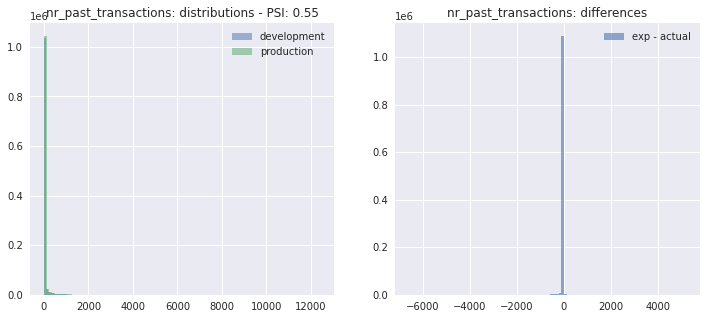

In [36]:
ft = "nr_past_transactions"
ft_dev = ft + "_exp"
ft_prod = ft + "_act"

psi = get_psi(combined_df[ft_dev].rename().to_frame(), 
                         combined_df[ft_prod].rename().to_frame()).loc[0, "psi"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_score_dist(combined_df[ft_dev], combined_df[ft_prod], bins=100, fig=fig, ax=axs[0], title=f"{ft}: distributions - PSI: {round(psi, 2)}")
plot_difference(combined_df[ft_dev], combined_df[ft_prod], bins=100, fig=fig, ax=axs[1], title=f"{ft}: differences") 

(<Figure size 864x360 with 2 Axes>,
 <AxesSubplot:title={'center':'fraud_score_2: differences'}>)

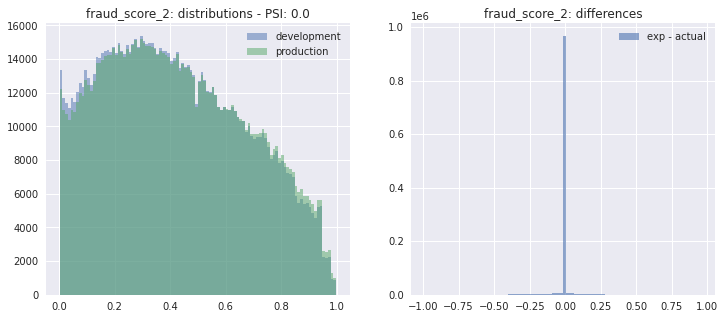

In [37]:
ft = "fraud_score_2"
ft_dev = ft + "_exp"
ft_prod = ft + "_act"

psi = get_psi(combined_df[ft_dev].rename().to_frame(), 
                         combined_df[ft_prod].rename().to_frame()).loc[0, "psi"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_score_dist(combined_df[ft_dev], combined_df[ft_prod], bins=100, fig=fig, ax=axs[0], title=f"{ft}: distributions - PSI: {round(psi, 2)}")
plot_difference(combined_df[ft_dev], combined_df[ft_prod], bins=100, fig=fig, ax=axs[1], title=f"{ft}: differences") 

(<Figure size 864x360 with 2 Axes>,
 <AxesSubplot:title={'center':'transaction_as_pct_of_balance: differences'}>)

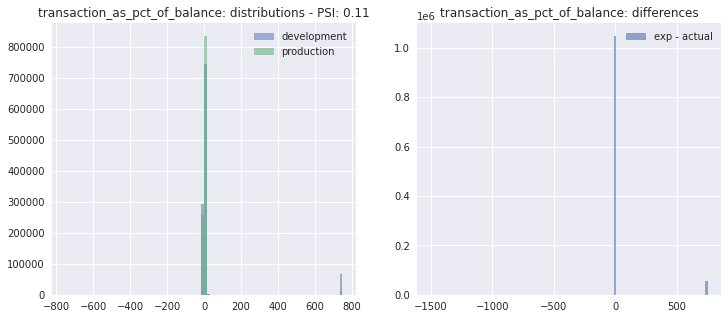

In [38]:
ft = "transaction_as_pct_of_balance"
ft_dev = ft + "_exp"
ft_prod = ft + "_act"

psi = get_psi(combined_df[ft_dev].rename().to_frame(), 
                         combined_df[ft_prod].rename().to_frame()).loc[0, "psi"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_score_dist(combined_df[ft_dev], combined_df[ft_prod], bins=100, fig=fig, ax=axs[0], title=f"{ft}: distributions - PSI: {round(psi, 2)}")
plot_difference(combined_df[ft_dev], combined_df[ft_prod], bins=100, fig=fig, ax=axs[1], title=f"{ft}: differences") 

In [39]:
# 2021/9 
# hot swap @ 2020/10/13 a snapshot before and after to look
#         - dev vs. prod
# - 2020/12/31 -> training
ft = "fraud_score_2"
ft_dev = ft + "_exp"
ft_prod = ft + "_act"
display(combined_df[[ft_dev]].isna().value_counts(normalize=True))
display(combined_df[[ft_prod]].isna().value_counts(normalize=True))
display(combined_df[[ft_dev, ft_prod]].describe().round(2))

fraud_score_2_exp
False                0.991693
True                 0.008307
dtype: float64

fraud_score_2_act
False                0.988825
True                 0.011175
dtype: float64

,fraud_score_2_exp,fraud_score_2_act
count,1100705.00,1097522.00
mean,0.42,0.43
std,0.25,0.25
min,0.00,0.00
25%,0.21,0.22
50%,0.40,0.41
75%,0.61,0.62
max,1.00,1.00


#### Produce scores and send to Arpit
---

In [41]:
display(prod_path)
display(dev_path)

prod_df = pd.read_parquet(prod_path)
dev_df = pd.read_feather(dev_path)

's3://sofi-data-science/jxu/data_dump/money_customer_risk/20210916-dev-prod-alignment/prod.parquet'

'../../data/combined_all_features/combined_1632521410.feather'

In [42]:
sample_date = "2021-09-15"
dev_df = dev_df[dev_df.sample_date==pd.Timestamp(sample_date)]

prod_df["last_checked_date"] = pd.to_datetime(prod_df["last_checked_date"])
prod_df["sample_date"] = prod_df["last_checked_date"].dt.date
prod_df = prod_df[prod_df["sample_date"]==pd.Timestamp(sample_date)]

/home/ec2-user/anaconda3/envs/customer_risk/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [43]:
dev_df = mu.preprocess(dev_df)

In [44]:
dev_df = mu.prep_customer_data(dev_df)  # get is_active here
features = incumbent_model.feature_name_

dev_df["pred"] = incumbent_model.predict_proba(dev_df[features])[:,1]
dev_df["score"] = mu.scale_scores(dev_df["pred"])

prod_df["pred"] = incumbent_model.predict_proba(prod_df[features])[:,1]
prod_df["score"] = mu.scale_scores(prod_df["pred"])

In [45]:
columns = ["party_id", "sample_date", "pred", "score"]

dev_df[columns].to_csv(os.path.join(s3_path, "dev_scores_updated.csv"))
prod_df[columns].to_csv(os.path.join(s3_path, "prod_scores_updated.csv"))